# Scaffold Analysis
This notebook runs a pipeline that takes a folder of highly contrasted images of scaffolds and reports their fiber diameter in mircon and milimeter. 

In [1]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature,filters
import cv2
import matplotlib.patches as patches
import matplotlib.cbook as cb
import GNP_scaffold_ia as sia
import csv 
import pandas as pd
import os
import statistics 
import time
from datetime import date

### Running Method on One Image

What color is the background? This can only be set to "Black" or "White". Capitalization is important!:Black
Known Length in mm: 10


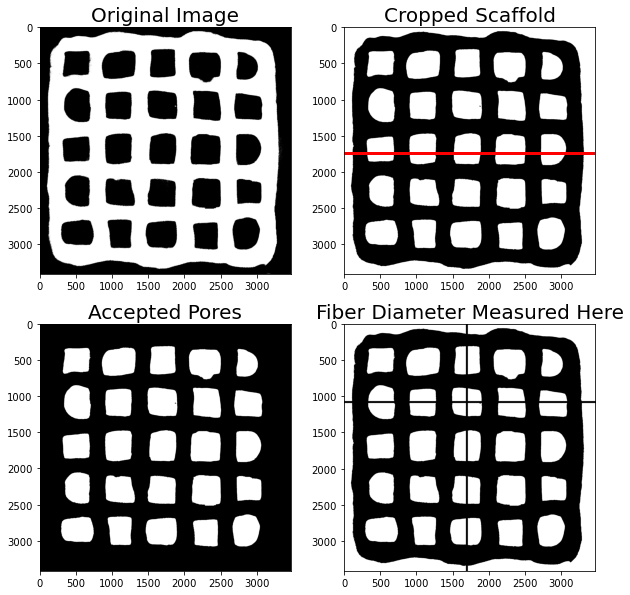

Image Name:  Example Scaffold.tif
Fiber Diameters in mm: [0.78009 0.84673 0.98001 0.78793 0.84673 0.96433]
Fiber Diameters in um: [780.09 846.73 980.01 787.93 846.73 964.33]
Average Fiber Diameter: 0.8676 mm

Non-porous area:  82.36043 mm^2

# of Pores Accepted:  25
Average pore size [mm^2]:  2.0477 mm^2
Total pore area [mm^2]:  51.1917 mm^2

Horizontal Fiber Diameters in mm: [1.08977 0.72913 0.79185 0.82321 0.78401 0.70953]
Horizontal Fiber Diameters in um: [1089.77  729.13  791.85  823.21  784.01  709.53]
Horizontal Average Fiber Diameter: 0.8212 mm

Vertical Fiber Diameters in mm: [0.78401 0.82321 0.99177 0.79577 0.84673 0.95649]
Vertical Fiber Diameters in um: [784.01 823.21 991.77 795.77 846.73 956.49]
Vertical Average Fiber Diameter: 0.8663 mm


In [2]:
path = 'Example Scaffold.tif'
background = input('What color is the background? This can only be set to "Black" or "White". Capitalization is important!:')
(org_image, scaffold, cropped) = sia.single_image(path, background)

#Adding a scale
# Read Image 
scale = Image.open("Example Scale.png")
know_length = int(input("Known Length in mm: ")) # Known length needs to be the horizontal distance in image

# Convert Image to Numpy as array 
scale = np.array(scale)
pixel_to_1mm = scale.shape[1]/know_length #Number of Pixels in 1mm

# Calculating Fiber Diameter
fiber_diameters, average_fiber_diameter = sia.fiber_diameter(path, pixel_to_1mm, background)
v_lengths, v_average_length, h_lengths, h_average_length, cX, cY = sia.fiber_diameter_v2(path, pixel_to_1mm, background)

# Converting Data to microns
fiber_diameters_micron = fiber_diameters * 1000 # Saving Fiber Diameter in microns
average_fiber_diameter_micron = average_fiber_diameter * 1000  # Saving Average Fiber Diameter in microns

v_fiber_diameters_micron = v_lengths * 1000 # Saving Fiber Diameter in microns
v_average_fiber_diameter_micron = v_average_length * 1000  # Saving Average Fiber Diameter in microns

h_fiber_diameters_micron = h_lengths * 1000 # Saving Fiber Diameter in microns
h_average_fiber_diameter_micron = h_average_length * 1000  # Saving Average Fiber Diameter in microns

# Calculating Non Porous area
non_porous_area = sia.surface_area(cropped, pixel_to_1mm)

# Calculate Porous area
pore_mask, a_porous_area, t_porous_area, pore_count = sia.pore_area(path, pixel_to_1mm, background)

# Creating a Figure
sia.create_figure(org_image, cropped, pore_mask, cX, cY)

# Printing Data
print('Image Name: ', path)
print("Fiber Diameters in mm:", fiber_diameters)
print("Fiber Diameters in um:", fiber_diameters*1000)
print("Average Fiber Diameter:", round(average_fiber_diameter, 4),'mm')
print()
print("Non-porous area: ", non_porous_area, 'mm^2')
print()
print("# of Pores Accepted: ", pore_count)
print("Average pore size [mm^2]: ", round(a_porous_area, 4), 'mm^2')
print('Total pore area [mm^2]: ', round(t_porous_area, 4), 'mm^2')
print()
print("Horizontal Fiber Diameters in mm:", h_lengths)
print("Horizontal Fiber Diameters in um:", h_lengths *1000)
print("Horizontal Average Fiber Diameter:", round(h_average_length, 4),'mm')
print()
print("Vertical Fiber Diameters in mm:", v_lengths)
print("Vertical Fiber Diameters in um:", v_lengths *1000)
print("Vertical Average Fiber Diameter:", round(v_average_length, 4),'mm')

## Running a Folder of Images

Type of Image [EX. png, tif]: tif
What color is the background? This can only be set to "Black" or "White". Capitalization is important!:Black
Known Length from Scale in mm: 10


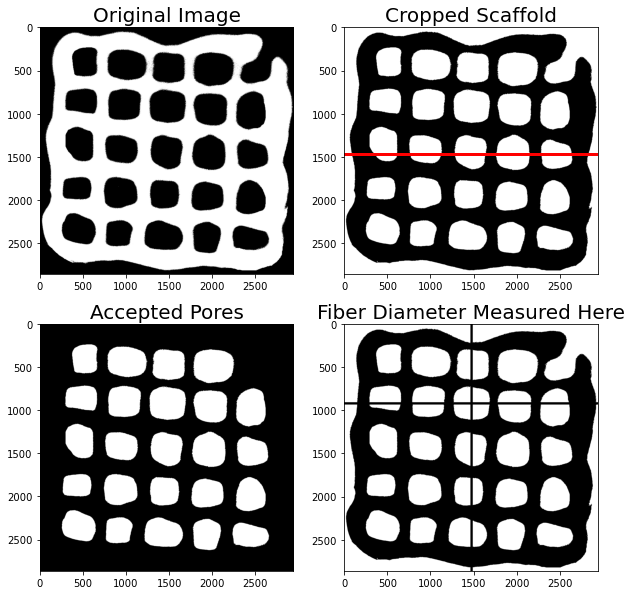

Image Name:  Scaffold_1.tif
Fiber Diameters in mm: [1.07029 0.66213 0.66667 0.56236 0.62132 0.95692]
Fiber Diameters in um: [1070.29  662.13  666.67  562.36  621.32  956.92]
Average Fiber Diameter: 0.7566 mm

Non-porous area:  81.97726 mm^2

# of Pores Accepted:  24
Average pore size [mm^2]:  2.2666 mm^2
Total pore area [mm^2]:  54.3985 mm^2

Horizontal Fiber Diameters in mm: [0.93424 0.56689 0.80726 0.77551 0.63039 0.75283]
Horizontal Fiber Diameters in um: [934.24 566.89 807.26 775.51 630.39 752.83]
Horizontal Average Fiber Diameter: 0.7445 mm

Vertical Fiber Diameters in mm: [1.19728 0.69388 0.71655 0.57596 0.61224 0.87982]
Vertical Fiber Diameters in um: [1197.28  693.88  716.55  575.96  612.24  879.82]
Vertical Average Fiber Diameter: 0.7793 mm


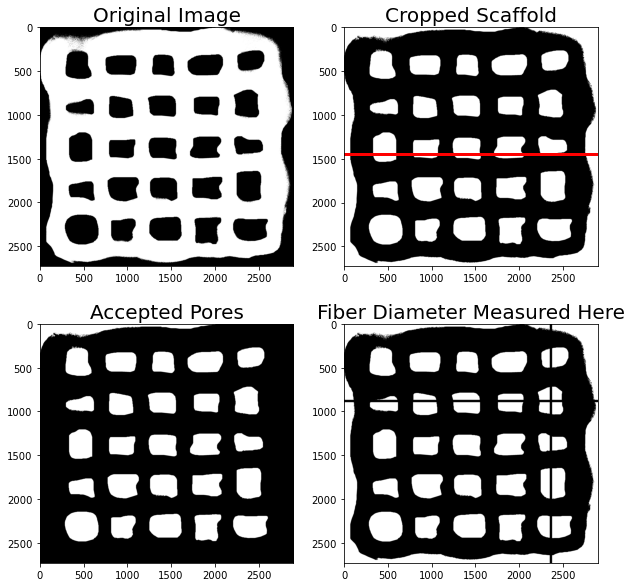

Image Name:  Scaffold_2.tif
Fiber Diameters in mm: [1.17914 0.87075 0.74376 0.86168 0.87075 0.94331]
Fiber Diameters in um: [1179.14  870.75  743.76  861.68  870.75  943.31]
Average Fiber Diameter: 0.9116 mm

Non-porous area:  56.72634 mm^2

# of Pores Accepted:  26
Average pore size [mm^2]:  1.5321 mm^2
Total pore area [mm^2]:  39.835 mm^2

Horizontal Fiber Diameters in mm: [1.24717 1.13379 1.14286 1.02948 1.02041 0.80272]
Horizontal Fiber Diameters in um: [1247.17 1133.79 1142.86 1029.48 1020.41  802.72]
Horizontal Average Fiber Diameter: 1.0627 mm

Vertical Fiber Diameters in mm: [1.03401 0.65306 0.88889 0.72562 0.91156 0.73923]
Vertical Fiber Diameters in um: [1034.01  653.06  888.89  725.62  911.56  739.23]
Vertical Average Fiber Diameter: 0.8254 mm


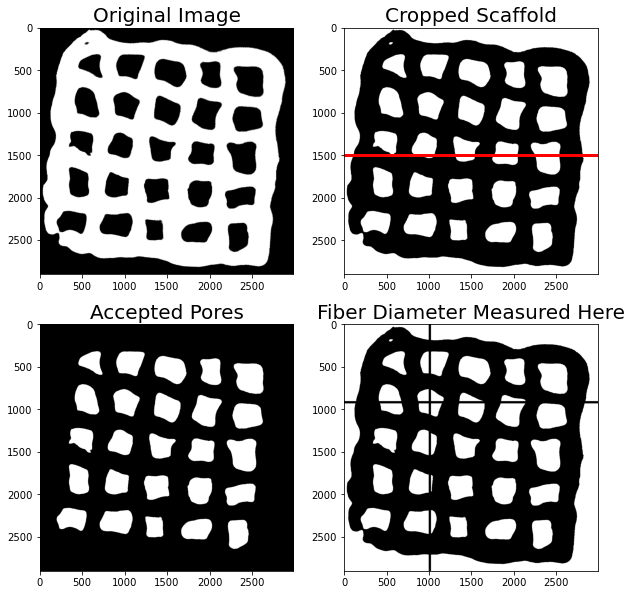

Image Name:  Scaffold_3.tif
Fiber Diameters in mm: [1.58277 0.839   1.02494 1.09297 0.75283 1.20181]
Fiber Diameters in um: [1582.77  839.   1024.94 1092.97  752.83 1201.81]
Average Fiber Diameter: 1.0824 mm

Non-porous area:  78.40762 mm^2

# of Pores Accepted:  25
Average pore size [mm^2]:  1.5136 mm^2
Total pore area [mm^2]:  37.8396 mm^2

Horizontal Fiber Diameters in mm: [0.92063 1.05669 0.92063 1.01134 0.93424 1.17007]
Horizontal Fiber Diameters in um: [ 920.63 1056.69  920.63 1011.34  934.24 1170.07]
Horizontal Average Fiber Diameter: 1.0023 mm

Vertical Fiber Diameters in mm: [1.43311 0.85714 1.0068  0.72562 0.87075 0.94785]
Vertical Fiber Diameters in um: [1433.11  857.14 1006.8   725.62  870.75  947.85]
Vertical Average Fiber Diameter: 0.9735 mm


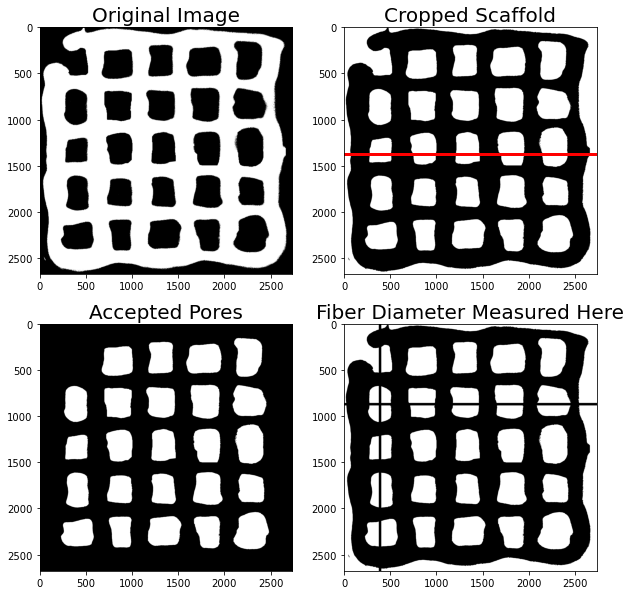

Image Name:  Scaffold_4.tif
Fiber Diameters in mm: [0.94785 0.97052 0.97506 0.93878 0.8254  1.11565]
Fiber Diameters in um: [ 947.85  970.52  975.06  938.78  825.4  1115.65]
Average Fiber Diameter: 0.9622 mm

Non-porous area:  64.96429 mm^2

# of Pores Accepted:  24
Average pore size [mm^2]:  1.8103 mm^2
Total pore area [mm^2]:  43.4469 mm^2

Horizontal Fiber Diameters in mm: [1.01587 0.61224 0.56689 0.67574 0.6712  0.61678]
Horizontal Fiber Diameters in um: [1015.87  612.24  566.89  675.74  671.2   616.78]
Horizontal Average Fiber Diameter: 0.6931 mm

Vertical Fiber Diameters in mm: [0.82086 0.87075 0.72562 0.73923 0.87982]
Vertical Fiber Diameters in um: [820.86 870.75 725.62 739.23 879.82]
Vertical Average Fiber Diameter: 0.8073 mm
# of Scaffolds without 6 fibers:  1
Run Time (Secs): 468.49247694015503


In [3]:
directory = "Example Images"
measured_imagedata = {}
file_type = input('Type of Image [EX. png, tif]: ')
background = input('What color is the background? This can only be set to "Black" or "White". Capitalization is important!:')

#Adding a scale
# Read Image 
scale = Image.open("Example Scale_2.png")
know_length = int(input("Known Length from Scale in mm: "))

# Convert Image to Numpy as array 
scale = np.array(scale)
pixel_to_1mm = scale.shape[1]/know_length #Number of Pixels in 1mm
start = time.time()

for filename in os.listdir(directory):
    if filename.endswith(file_type):
        path = directory + "/" + str(filename)
        (org_image, scaffold, cropped) = sia.single_image(path, background)
        
        # Calculating Measurements
        fiber_diameters, average_fiber_diameter = sia.fiber_diameter(path, pixel_to_1mm, background)
        v_lengths, v_average_length, h_lengths, h_average_length, cX, cY = sia.fiber_diameter_v2(path, pixel_to_1mm, background)
        non_porous_area = sia.surface_area(cropped, pixel_to_1mm)
        pore_mask, a_porous_area, t_porous_area, pore_count = sia.pore_area(path, pixel_to_1mm, background)
        
        # Converting Data to microns
        fiber_diameters_micron = fiber_diameters * 1000 # Saving Fiber Diameter in microns
        average_fiber_diameter_micron = average_fiber_diameter * 1000  # Saving Average Fiber Diameter in microns

        v_fiber_diameters_micron = v_lengths * 1000 # Saving Fiber Diameter in microns
        v_average_fiber_diameter_micron = v_average_length * 1000  # Saving Average Fiber Diameter in microns

        h_fiber_diameters_micron = h_lengths * 1000 # Saving Fiber Diameter in microns
        h_average_fiber_diameter_micron = h_average_length * 1000  # Saving Average Fiber Diameter in microns
        
        # Compiling the Image data 
        imd = np.array([h_average_fiber_diameter_micron, v_average_fiber_diameter_micron, average_fiber_diameter_micron,
                        non_porous_area, a_porous_area, t_porous_area, pore_count])
        all_fiber_diameters = np.concatenate((h_fiber_diameters_micron, v_fiber_diameters_micron, fiber_diameters_micron))
        image_data = np.append(all_fiber_diameters, imd)
        measured_imagedata[filename] = image_data
        
        # Creating a Figure
        sia.create_figure(org_image, cropped, pore_mask, cX, cY)

        # Printing Data
        print('Image Name: ', filename)
        print("Fiber Diameters in mm:", fiber_diameters)
        print("Fiber Diameters in um:", fiber_diameters*1000)
        print("Average Fiber Diameter:", round(average_fiber_diameter, 4),'mm')
        print()
        print("Non-porous area: ", non_porous_area, 'mm^2')
        print()
        print("# of Pores Accepted: ", pore_count)
        print("Average pore size [mm^2]: ", round(a_porous_area, 4), 'mm^2')
        print('Total pore area [mm^2]: ', round(t_porous_area, 4), 'mm^2')
        print()
        print("Horizontal Fiber Diameters in mm:", h_lengths)
        print("Horizontal Fiber Diameters in um:", h_lengths *1000)
        print("Horizontal Average Fiber Diameter:", round(h_average_length, 4),'mm')
        print()
        print("Vertical Fiber Diameters in mm:", v_lengths)
        print("Vertical Fiber Diameters in um:", v_lengths *1000)
        print("Vertical Average Fiber Diameter:", round(v_average_length, 4),'mm')
        continue
    
    else:
        continue

# Printing Results of the Entire Folder        
sixfiber_count = 0 
otherfiber_count = 0 
total_count = 0

otherfiber_dic = {}
sixfiber_dic = {}
for key, value in measured_imagedata.items():
    total_count += 1
    
    if len(value)== 25: # See "Field" for details on each 25 datapoints 
        sixfiber_count += 1
        sixfiber_dic[key]= value
    else:
        otherfiber_count += 1
        otherfiber_dic[key] = value
    
print("# of Scaffolds without 6 fibers: ", otherfiber_count)
end = time.time()
total_time = end - start
print("Run Time (Secs):", str(total_time))

## Exporting the Data into .csv

In [4]:
# field names 
fields = ['Horizontal Fiber 1 Diameters (um)','Horizontal Fiber 2 Diameters (um)','Horizontal Fiber 3 Diameters (um)',
          'Horizontal Fiber 4 Diameters (um)','Horizontal Fiber 5 Diameters (um)','Horizontal Fiber 6 Diameters (um)',
          'Vertical Fiber 1 Diameters (um)','Vertical Fiber 2 Diameters (um)','Vertical Fiber 3 Diameters (um)',
          'Vertical Fiber 4 Diameters (um)','Vertical Fiber 5 Diameters (um)','Vertical Fiber 6 Diameters (um)',
          'Fiber 1 Diameters (um)','Fiber 2 Diameters (um)','Fiber 3 Diameters (um)','Fiber 4 Diameters (um)',
          'Fiber 5 Diameters (um)','Fiber 6 Diameters (um)','Horizontal Average Fiber Diameter (um)',
          'Vertical Average Fiber Diameter (um)','Average Fiber Diameter (um)','Non-Porous Area (um)^2',
          'Average Pore Area (um)^2', 'Total Porous Area (um)^2', "Pore Count"]

# data rows of csv file 
sixfiber_images = pd.DataFrame.from_dict(sixfiber_dic, orient='index', columns = fields)
otherfiber_images = pd.DataFrame.from_dict(otherfiber_dic, orient = 'index')

# name of csv file
today = date.today()
filename_six = directory + "_Six Fiber Scaffolds_"+ str(today)
filename_other = directory + "_Other Fiber Count Scaffolds_"+ str(today)

# exporting to csv
sixfiber_images.to_csv(filename_six + '.csv')
otherfiber_images.to_csv(filename_other + '.csv')